In [1]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv("heart.csv")
col_names = list(df.columns)

In [4]:
feature_cols = col_names[:13]
X = df[feature_cols]
y = df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [17]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(feature_cols)
print(sorted(fit.scores_,reverse = True))
lst = []
for i in range(13):
    lst.append(tuple([feature_cols[i],fit.scores_[i]]))

[16.117 25.792 69.772  6.458  2.203  0.237  5.777 65.12  70.952 68.551
 40.902 54.56  40.408]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
[70.95243821639583, 69.77227149304562, 68.55143941030717, 65.12010440124943, 54.55983379579102, 40.90207062846906, 40.407696149467945, 25.792191153788792, 16.11669982318991, 6.458168674003441, 5.7772089051661775, 2.2029834463816798, 0.23694233592171493]


In [18]:
print(lst)

[('age', 16.11669982318991), ('sex', 25.792191153788792), ('cp', 69.77227149304562), ('trestbps', 6.458168674003441), ('chol', 2.2029834463816798), ('fbs', 0.23694233592171493), ('restecg', 5.7772089051661775), ('thalach', 65.12010440124943), ('exang', 70.95243821639583), ('oldpeak', 68.55143941030717), ('slope', 40.90207062846906), ('ca', 54.55983379579102), ('thal', 40.407696149467945)]


In [20]:
print(sorted(lst,key=lambda item:item[1],reverse = True))

[('exang', 70.95243821639583), ('cp', 69.77227149304562), ('oldpeak', 68.55143941030717), ('thalach', 65.12010440124943), ('ca', 54.55983379579102), ('slope', 40.90207062846906), ('thal', 40.407696149467945), ('sex', 25.792191153788792), ('age', 16.11669982318991), ('trestbps', 6.458168674003441), ('restecg', 5.7772089051661775), ('chol', 2.2029834463816798), ('fbs', 0.23694233592171493)]


# selecting features using univariante selection

In [47]:
updated_df1 = df[['thalach','ca','oldpeak','cp','exang','slope','thal','target']]
feature_cols1 = ['thalach','ca','oldpeak','cp','exang','slope','thal']

In [48]:
X1 = df[feature_cols1]
y1 = df.target
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.3,random_state = 0)

     thalach  ca  oldpeak  cp  exang  slope  thal
0        150   0      2.3   3      0      0     1
1        187   0      3.5   2      0      0     2
2        172   0      1.4   1      0      2     2
3        178   0      0.8   1      0      2     2
4        163   0      0.6   0      1      2     2
..       ...  ..      ...  ..    ...    ...   ...
298      123   0      0.2   0      1      1     3
299      132   0      1.2   3      0      1     3
300      141   2      3.4   0      0      1     3
301      115   1      1.2   0      1      1     3
302      174   1      0.0   1      0      1     2

[303 rows x 7 columns]


In [52]:
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X1_train,y1_train)
y1_pred = clf.predict(X1_test)

In [53]:
print("Accuracy :",metrics.accuracy_score(y1_test,y1_pred))

Accuracy : 0.7582417582417582


basic accuracy has increased by 1% ie 75

In [55]:
en = []
for i in range(5,20):
    for j in range(5,8):
        clf = DecisionTreeClassifier(criterion = "entropy",random_state = 0,max_depth = i,max_features = j)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
        clf = clf.fit(X1_train,y1_train)
        y1_pred = clf.predict(X1_test)
        en.append(tuple([i,j,metrics.accuracy_score(y1_test,y1_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))

In [56]:
max(en,key=lambda item:item[2])

(6, 5, 0.8351648351648352)

#increased effiencey by 2% ie to 83 for entrophy

In [64]:
clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = 5,max_features = 4)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
# using max_features = 11  and max_depth = 5 increased the accuracy to 80
clf = clf.fit(X1_train,y1_train)
y1_pred = clf.predict(X1_test)
print("Accuracy:",metrics.accuracy_score(y1_test,y1_pred))

Accuracy: 0.8241758241758241


In [58]:
max(gini,key=lambda item:item[2])

(5, 4, 0.8241758241758241)

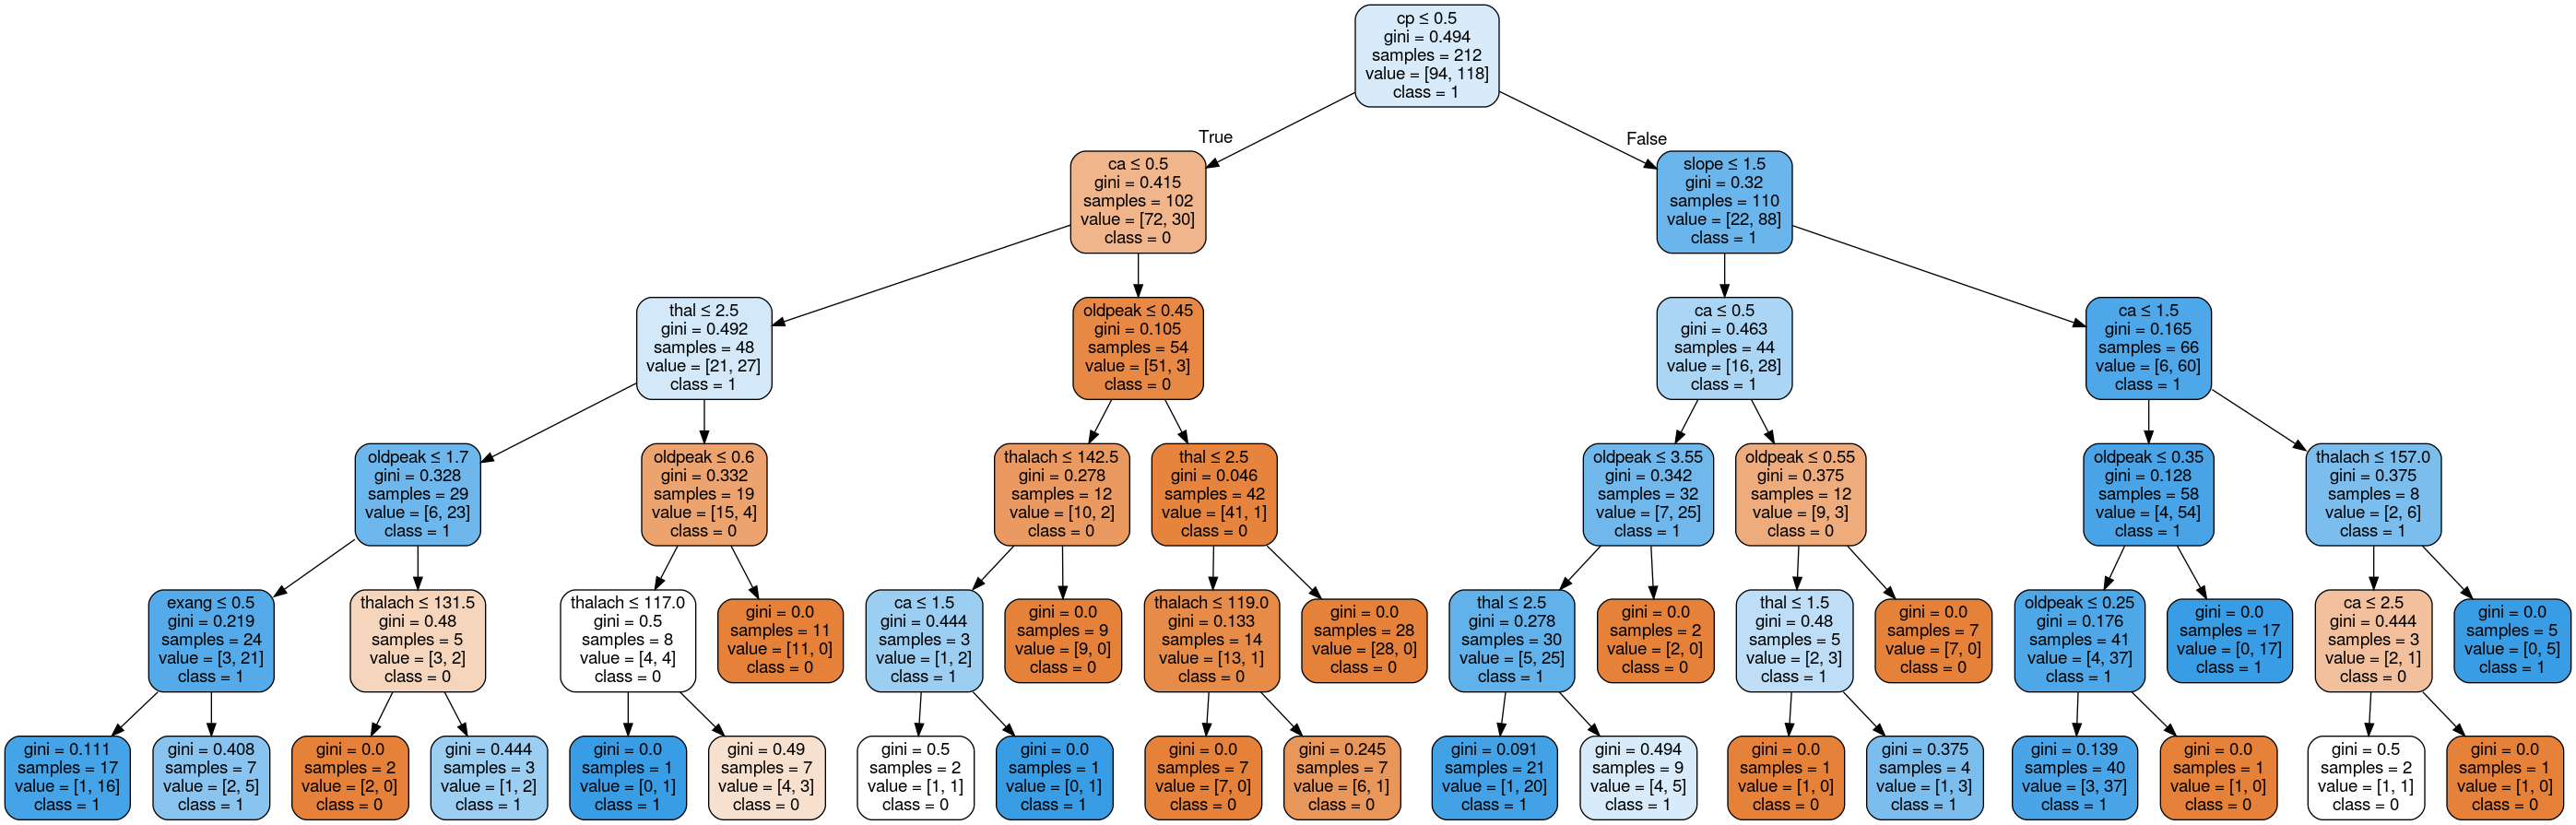

In [65]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True , rounded = True , special_characters = True ,feature_names = feature_cols1,class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('heart.png')
Image(graph.create_png())

#increased effiencey by 2% ie to 82 for gini

In [ ]:
clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = 6,max_features = 5)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
# using max_features = 11  and max_depth = 5 increased the accuracy to 80
clf = clf.fit(X1_train,y1_train)
y1_pred = clf.predict(X1_test)
print("Accuracy:",metrics.accuracy_score(y1_test,y1_pred))

In [59]:
clf = DecisionTreeClassifier(criterion = "entropy",random_state = 0,max_depth = 6,max_features = 5)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
# using max_features = 11  and max_depth = 5 increased the accuracy to 80
clf = clf.fit(X1_train,y1_train)
y1_pred = clf.predict(X1_test)
print("Accuracy:",metrics.accuracy_score(y1_test,y1_pred))

Accuracy: 0.8351648351648352


In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/home/arun/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


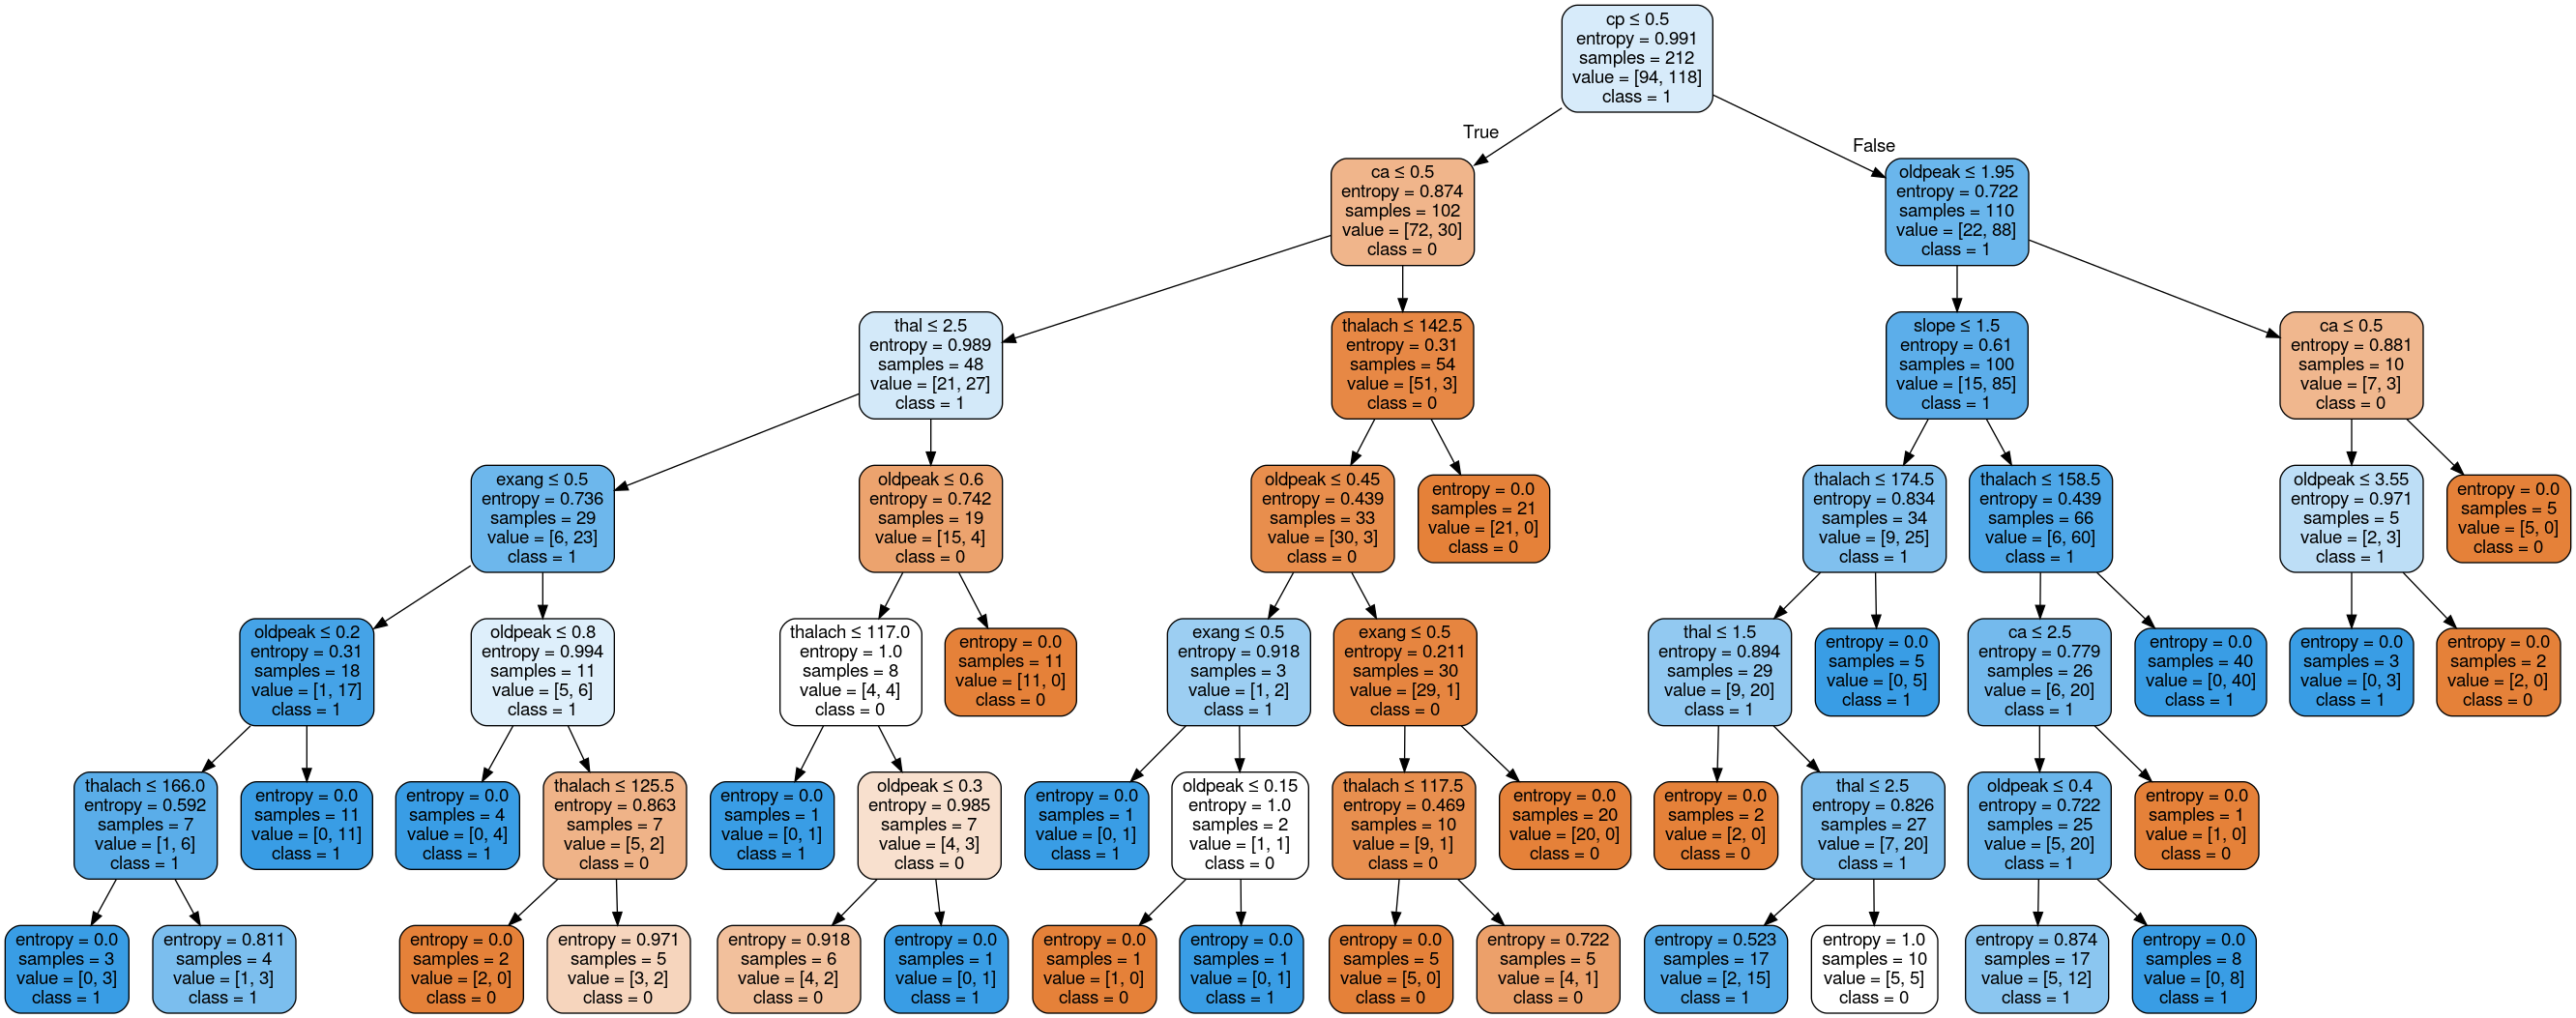

In [63]:
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True , rounded = True , special_characters = True ,feature_names = feature_cols1,class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')
Image(graph.create_png())

In [82]:
#overall features
feat = set(feature_cols1)
print(feat)

{'thal', 'thalach', 'slope', 'exang', 'cp', 'oldpeak', 'ca'}


# Recursive Feature Elimination

In [182]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [183]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print(feature_cols)
print("Feature Ranking: %s" % fit.ranking_)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Feature Ranking: [10  1  4  8 11  9  6  7  1  5  1  3  2]


/home/arun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/arun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/arun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/arun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/arun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


In [184]:
feature_cols2 = ['sex' , 'thalach' , 'oldpeak']

In [185]:
X2 = df[feature_cols2]
y2 = df.target
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.3,random_state = 0)

In [186]:
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X2_train,y2_train)
y2_pred = clf.predict(X2_test)

In [187]:
print("Accuracy:",metrics.accuracy_score(y2_test,y2_pred))

Accuracy: 0.6153846153846154


In [188]:
en = []
for i in range(5,20):
    for j in range(2,4):
        clf = DecisionTreeClassifier(criterion = "entropy",random_state = 0,max_depth = i,max_features = j)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
        clf = clf.fit(X2_train,y2_train)
        y2_pred = clf.predict(X2_test)
        en.append(tuple([i,j,metrics.accuracy_score(y2_test,y2_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))

In [189]:
max(en,key=lambda item:item[2])

(6, 3, 0.7362637362637363)

In [190]:
gini = []
for i in range(5,20):
    for j in range(2,4):
        clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = i,max_features = j)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
        clf = clf.fit(X2_train,y2_train)
        y2_pred = clf.predict(X2_test)
        gini.append(tuple([i,j,metrics.accuracy_score(y2_test,y2_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))

In [191]:
max(gini,key=lambda item:item[2])

(5, 2, 0.6923076923076923)

In [231]:
feat2 = set(feature_cols2)

In [232]:
feature_cols3 = list(feat.union(feat2))

In [233]:
print(feature_cols3)

['thal', 'thalach', 'slope', 'exang', 'cp', 'oldpeak', 'ca', 'sex']


In [234]:
X3 = df[feature_cols3]
y3 = df.target
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size = 0.3,random_state = 0)

In [235]:
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X3_train,y3_train)
y3_pred = clf.predict(X3_test)

In [236]:
print("Accuracy :",metrics.accuracy_score(y3_test,y3_pred))

Accuracy : 0.7692307692307693


In [237]:
gini = []
for i in range(5,20):
    for j in range(2,9):
        clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = i,max_features = j)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
        clf = clf.fit(X3_train,y3_train)
        y3_pred = clf.predict(X3_test)
        gini.append(tuple([i,j,metrics.accuracy_score(y3_test,y3_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))

In [238]:
max(gini,key=lambda item:item[2])

(5, 4, 0.8351648351648352)

In [239]:
clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = 5,max_features = 4)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
# using max_features = 11  and max_depth = 5 increased the accuracy to 80
clf = clf.fit(X3_train,y3_train)
y3_pred = clf.predict(X3_test)
print("Accuracy:",metrics.accuracy_score(y3_test,y3_pred))

Accuracy: 0.8351648351648352


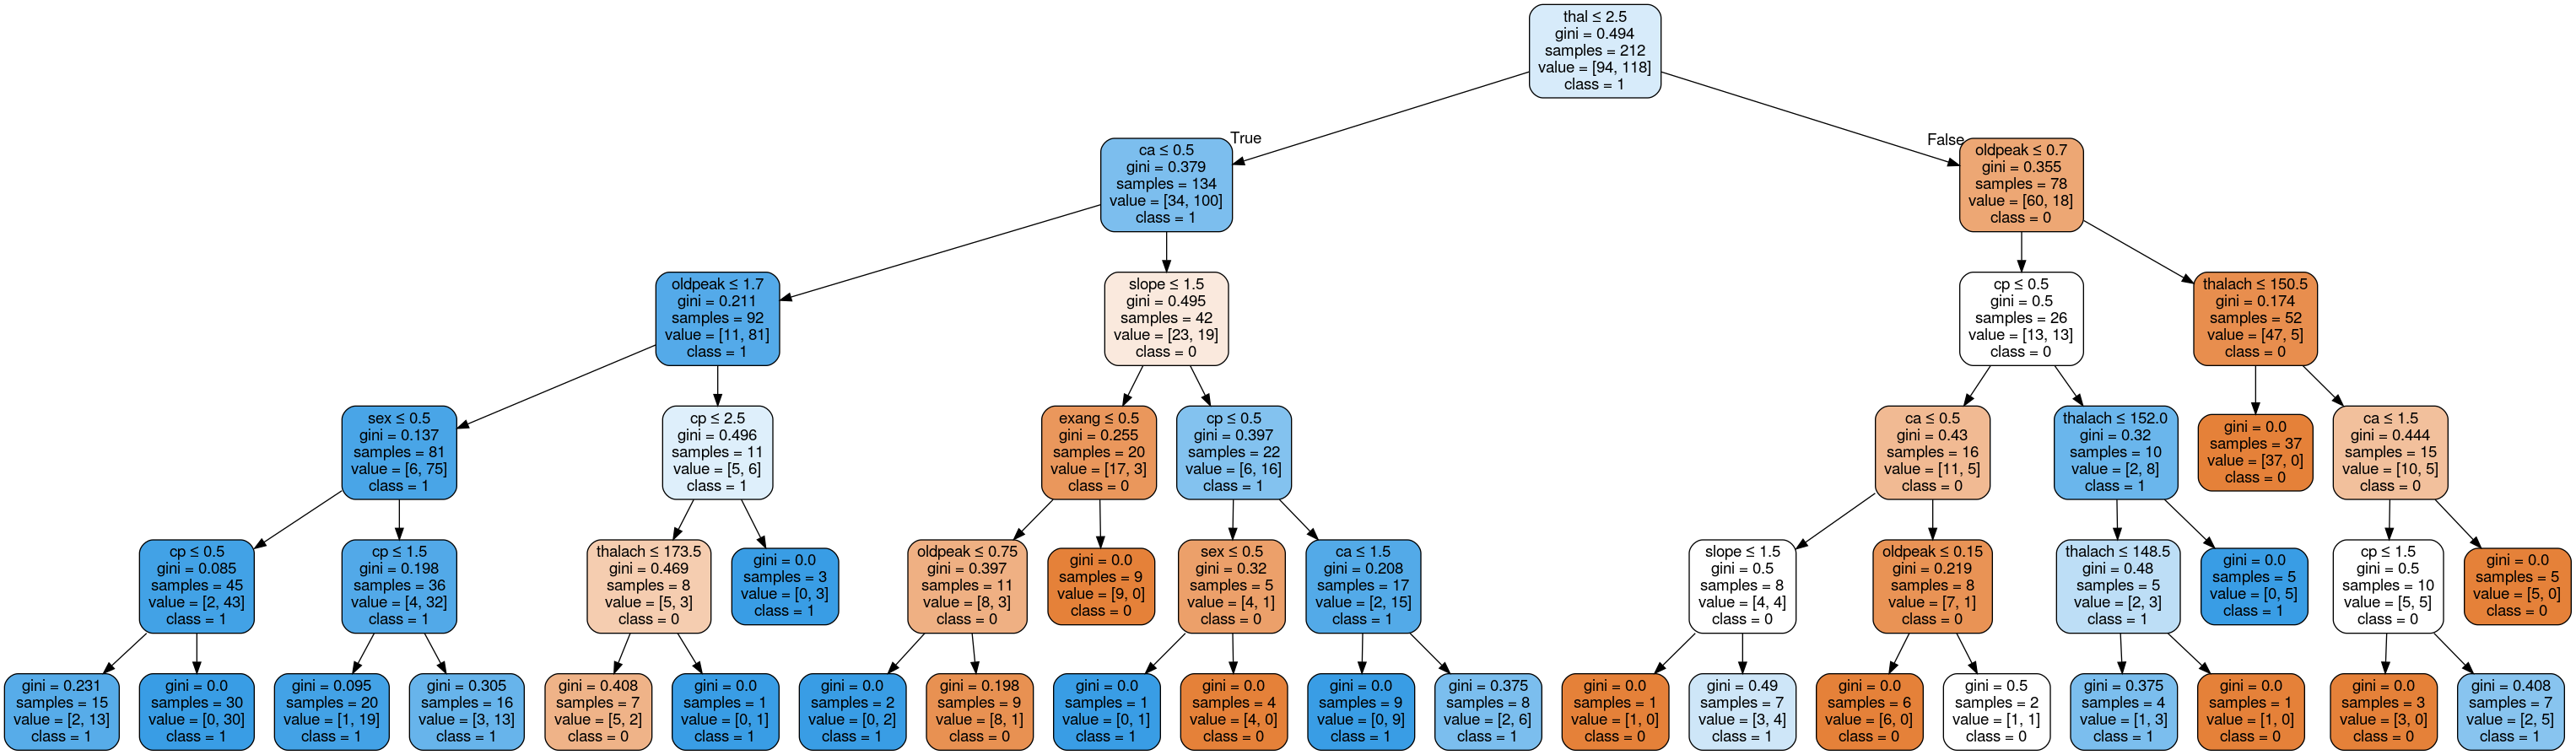

In [240]:
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True , rounded = True , special_characters = True ,feature_names = feature_cols3,class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')
Image(graph.create_png())

incresed by 1% for gini using both Recursive Feature Elimination and # selecting features using univariante selection ie 83%

In [202]:
en = []
for i in range(5,20):
    for j in range(2,9):
        clf = DecisionTreeClassifier(criterion = "entropy",random_state = 0,max_depth = i,max_features = j)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
        clf = clf.fit(X3_train,y3_train)
        y3_pred = clf.predict(X3_test)
        en.append(tuple([i,j,metrics.accuracy_score(y3_test,y3_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))

In [203]:
max(en,key=lambda item:item[2])

(6, 5, 0.8351648351648352)

 no increase for entropy using both Recursive Feature Elimination and # selecting features using univariante selection ie 83%

# Feature Importance

In [204]:
from sklearn.ensemble import ExtraTreesClassifier

In [205]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.074 0.063 0.119 0.059 0.059 0.019 0.041 0.081 0.09  0.095 0.069 0.115
 0.117]


In [206]:
lst1 = []
for i in range(13):
    lst1.append(tuple([feature_cols[i],model.feature_importances_[i]]))

In [207]:
print(lst1)

[('age', 0.07371316804440395), ('sex', 0.06280128863637492), ('cp', 0.11909524534793238), ('trestbps', 0.05901648295682457), ('chol', 0.05893474564167233), ('fbs', 0.01880091745139778), ('restecg', 0.04114349246767783), ('thalach', 0.08120451162859088), ('exang', 0.08965557767854185), ('oldpeak', 0.09464453736339927), ('slope', 0.06917528821171372), ('ca', 0.11492790826168858), ('thal', 0.11688683630978208)]


In [208]:
print(sorted(lst1,key = lambda item : item[1],reverse = True))

[('cp', 0.11909524534793238), ('thal', 0.11688683630978208), ('ca', 0.11492790826168858), ('oldpeak', 0.09464453736339927), ('exang', 0.08965557767854185), ('thalach', 0.08120451162859088), ('age', 0.07371316804440395), ('slope', 0.06917528821171372), ('sex', 0.06280128863637492), ('trestbps', 0.05901648295682457), ('chol', 0.05893474564167233), ('restecg', 0.04114349246767783), ('fbs', 0.01880091745139778)]


In [214]:
print(feature_cols3)

['thal', 'thalach', 'slope', 'exang', 'cp', 'oldpeak', 'ca', 'sex']


In [215]:
feature_cols4 = feature_cols3

In [217]:
feature_cols4.append('age')
feature_cols4.append('trestbps')

In [256]:
print(feature_cols4)

['thal', 'thalach', 'slope', 'exang', 'cp', 'oldpeak', 'ca', 'sex', 'age', 'trestbps']


In [219]:
X4 = df[feature_cols4]
y4 = df.target
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y4,test_size = 0.3,random_state = 0)

In [220]:
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X4_train,y4_train)
y4_pred = clf.predict(X4_test)

In [221]:
print("Accuracy :",metrics.accuracy_score(y4_test,y4_pred))

Accuracy : 0.7142857142857143


In [222]:
en = []
for i in range(5,20):
    for j in range(2,10):
        clf = DecisionTreeClassifier(criterion = "entropy",random_state = 0,max_depth = i,max_features = j)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
        clf = clf.fit(X4_train,y4_train)
        y4_pred = clf.predict(X4_test)
        en.append(tuple([i,j,metrics.accuracy_score(y4_test,y4_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))

In [223]:
max(en,key=lambda item:item[2])

(8, 3, 0.8241758241758241)

In [224]:
gini = []
for i in range(5,20):
    for j in range(2,10):
        clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = i,max_features = j)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
        clf = clf.fit(X4_train,y4_train)
        y4_pred = clf.predict(X4_test)
        gini.append(tuple([i,j,metrics.accuracy_score(y4_test,y4_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))

In [225]:
max(gini,key=lambda item:item[2])

(6, 3, 0.8131868131868132)

 without trestbps
 entropy (5, 2, 0.8021978021978022)
 gini (5, 2, 0.8021978021978022)
 with trestbps
 entropy (8, 3, 0.8241758241758241)
 gini (6, 3, 0.8131868131868132)

# Conclusion

 features are :['thal', 'thalach', 'slope', 'exang', 'cp', 'oldpeak', 'ca', 'sex']



clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = 5,max_features = 4)
 #using max_depth = 6 increased the acuracy to 80
 #using max_features = 8 remains same as 80
 #using max_features = 11  and max_depth = 5 increased the accuracy to 80
clf = clf.fit(X3_train,y3_train)
y3_pred = clf.predict(X3_test)
print("Accuracy:",metrics.accuracy_score(y3_test,y3_pred))


# Accuracy = 83 %

# Decision Tree

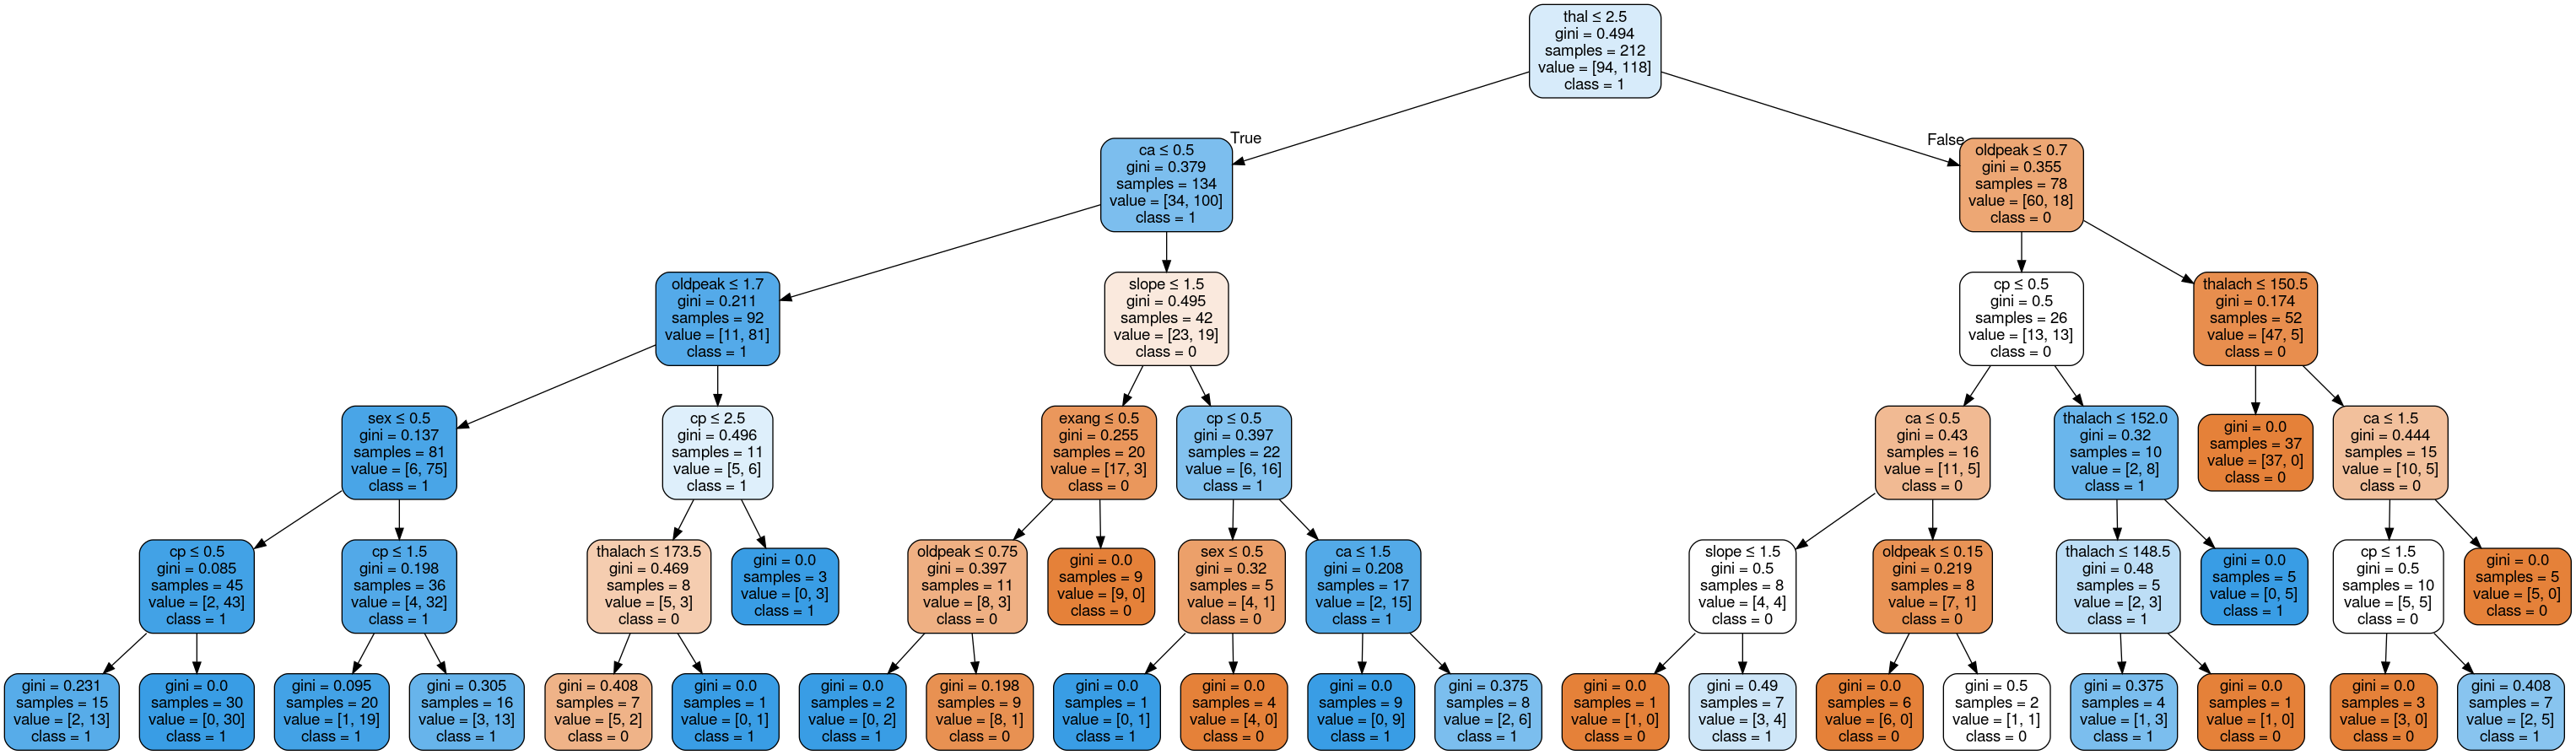

In [241]:
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True , rounded = True , special_characters = True ,feature_names = feature_cols3,class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')
Image(graph.create_png())

# Trying to prune

In [3]:
features = ['thal', 'thalach', 'slope', 'exang', 'cp', 'oldpeak', 'ca', 'sex']

In [4]:
X3 = df[features]
y3 = df.target
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size = 0.3,random_state = 0)

In [5]:
gini = []
for i in range(5,20):
    for j in range(2,8):
        for k in range(5,20):
            for l in range(2,20):#may be 9 hope soo
                clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = i,max_features = j,max_leaf_nodes = k,min_samples_leaf = l )
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
                clf = clf.fit(X3_train,y3_train)
                y3_pred = clf.predict(X3_test)
                gini.append(tuple([i,j,k,l,metrics.accuracy_score(y3_test,y3_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))
    print(i)

5
6
7
8
9
10


KeyboardInterrupt: 

In [247]:
max(gini,key=lambda item:item[4])

(6, 3, 19, 2, 0.8461538461538461)

In [8]:
clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = 6,max_features = 3,max_leaf_nodes = 19,min_samples_leaf = 2 )
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
clf = clf.fit(X3_train,y3_train)
y3_pred = clf.predict(X3_test)
                #gini.append(tuple([i,j,k,l,metrics.accuracy_score(y3_test,y3_pred)]))
print("Accuracy:",metrics.accuracy_score(y3_test,y3_pred))

Accuracy: 0.8461538461538461


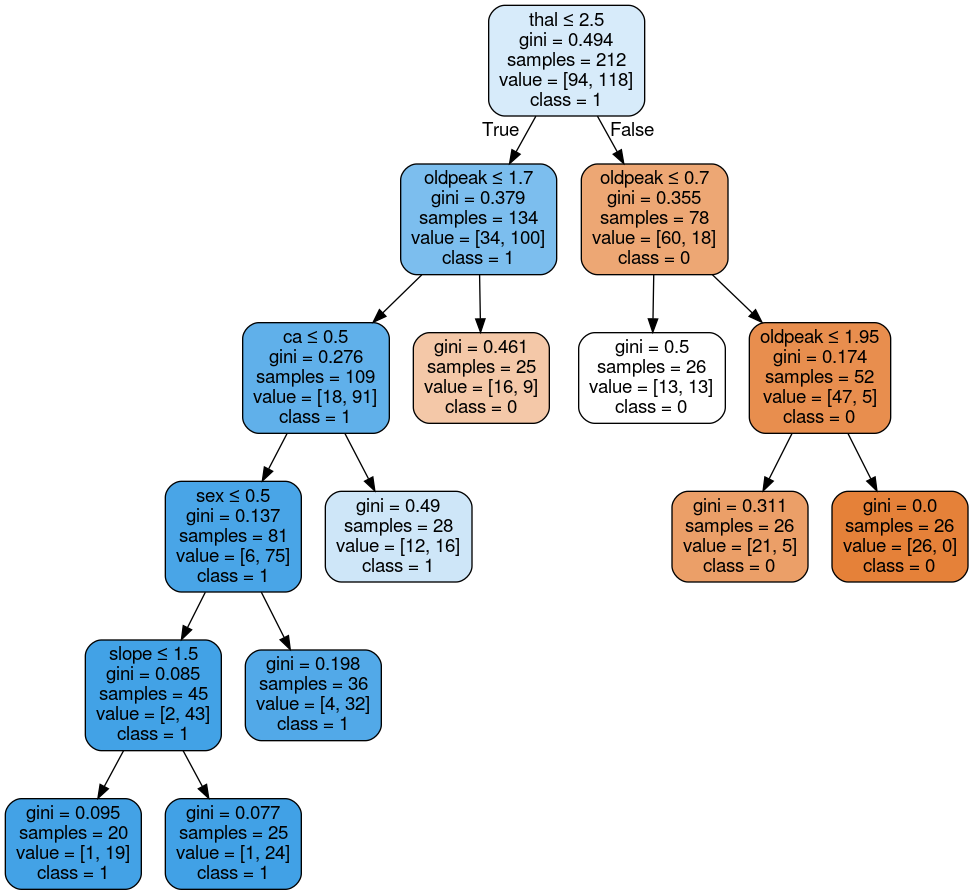

In [18]:
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True , rounded = True , special_characters = True ,feature_names = features,class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('heart84log2.png')
Image(graph.create_png())

In [6]:
gini = []
lst = ["auto", "sqrt", "log2"]
for i in range(5,20):
    for j in range(2,9):
        for k in range(5,20):
            for l in range(2,20):
                for m in range(0,20):#may be 9 hope soo
                    clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = i,max_features = j,max_leaf_nodes = k,min_samples_leaf = l )
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
                    clf = clf.fit(X3_train,y3_train)
                    y3_pred = clf.predict(X3_test)
                    gini.append(tuple([i,j,k,l,m,metrics.accuracy_score(y3_test,y3_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))
    print(i)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [7]:
max(gini,key=lambda item:item[4])

(5, 2, 5, 2, 19, 0.7582417582417582)